In [1]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt
import glob

In [5]:
folder_path = 'Z:\\Sasindu\\2_Discharge_ET_Madagascar\\2_Discharge_ET_Madagascar\\2c_Rainfall_ET_M'
blue_files = sorted(glob.glob(os.path.join(folder_path, '*.tif')))
folder_path_green = 'Z:\\Sasindu\\2_Discharge_ET_Madagascar\\2_Discharge_ET_Madagascar\\2b_Incremental_ET_M'
green_files = sorted(glob.glob(os.path.join(folder_path_green, '*.tif')))

In [3]:
def load_rasters(file_list):
    data_stack = []
    for f in file_list:
        with rasterio.open(f) as src:
            data = src.read(1)  # Read band 1
            data_stack.append(data)
    return np.array(data_stack)

In [6]:
blue_et_stack = load_rasters(blue_files)
green_et_stack = load_rasters(green_files)

In [7]:
print("Blue ET shape:", blue_et_stack.shape)

Blue ET shape: (228, 1433, 762)


In [8]:
print("Green ET shape:", green_et_stack.shape)

Green ET shape: (228, 1433, 762)


In [9]:
def check_missing(data_stack, name):
    missing = np.isnan(data_stack) | (data_stack == -9999)  # Adjust NoData value if needed
    print(f"{name}: Total missing pixels = {np.sum(missing)}")
    print(f"{name}: % missing = {100 * np.sum(missing) / data_stack.size:.2f}%")
    return missing

In [10]:
blue_missing = check_missing(blue_et_stack, 'Blue ET')

Blue ET: Total missing pixels = 121989348
Blue ET: % missing = 49.00%


In [11]:
green_missing = check_missing(green_et_stack, 'Green ET')

Green ET: Total missing pixels = 121989348
Green ET: % missing = 49.00%


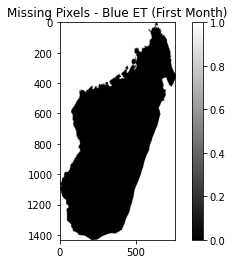

In [12]:
plt.imshow(blue_missing[0], cmap='gray')
plt.title("Missing Pixels - Blue ET (First Month)")
plt.colorbar()
plt.show()

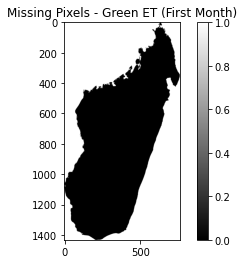

In [13]:
plt.imshow(green_missing[0], cmap='gray')
plt.title("Missing Pixels - Green ET (First Month)")
plt.colorbar()
plt.show()

In [14]:
from collections import Counter

file_names = [os.path.basename(f) for f in blue_files]
duplicates = [f for f, count in Counter(file_names).items() if count > 1]
print("Duplicate Blue ET files:", duplicates)

Duplicate Blue ET files: []


In [15]:
duplicates = []
for i in range(len(blue_et_stack)-1):
    if np.allclose(blue_et_stack[i], blue_et_stack[i+1], equal_nan=True):
        duplicates.append((i, i+1))
print("Duplicate values across months:", duplicates)

Duplicate values across months: []


In [16]:
def summary_stats(data_stack, name):
    flat = data_stack[~np.isnan(data_stack)]
    print(f"Stats for {name}")
    print("Min:", np.min(flat))
    print("Max:", np.max(flat))
    print("Mean:", np.mean(flat))
    print("Std Dev:", np.std(flat))

summary_stats(blue_et_stack, "Blue ET")

Stats for Blue ET
Min: 0.0
Max: 1394.4062
Mean: 49.328804
Std Dev: 42.61285


In [17]:
summary_stats(green_et_stack, "Green ET")

Stats for Green ET
Min: 0.0
Max: 1326.9219
Mean: 11.510685
Std Dev: 24.904295


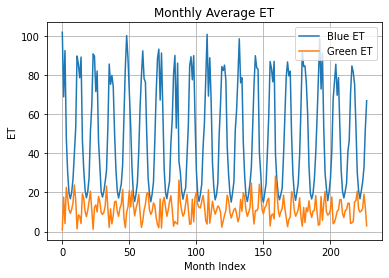

In [18]:
blue_monthly_avg = np.nanmean(blue_et_stack, axis=(1,2))
green_monthly_avg = np.nanmean(green_et_stack, axis=(1,2))

plt.plot(blue_monthly_avg, label='Blue ET')
plt.plot(green_monthly_avg, label='Green ET')
plt.title("Monthly Average ET")
plt.xlabel("Month Index")
plt.ylabel("ET")
plt.legend()
plt.grid(True)
plt.show()

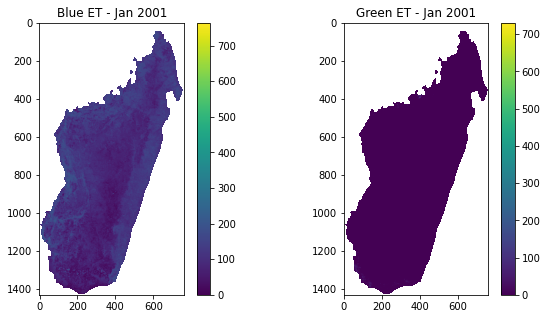

In [19]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(blue_et_stack[0], cmap='viridis')
plt.title("Blue ET - Jan 2001")
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(green_et_stack[0], cmap='viridis')
plt.title("Green ET - Jan 2001")
plt.colorbar()
plt.show()